In [5]:
import pandas as pd

In [17]:
# Load the historical data
df = pd.read_csv('starbucks_post_comment_raw_data.csv')

In [18]:
df.head()

,post_id,post_author,comment_auther,comment_id,comment_body,comment_score,comment_created_utc,comment_permalink,is_root_comment,comment_author_flair_text
0,xr8fc3,swiftlocked,Saint-Claire,iqdfbj8,That's really bold and honestly why would they...,2577,1.664463e+09,/r/starbucks/comments/xr8fc3/when_they_buy_a_0...,True,Former Partner
1,xr8fc3,swiftlocked,angiehawkeye,iqdmth8,"I'm confused, they only paid 5 cents and thoug...",1286,1.664466e+09,/r/starbucks/comments/xr8fc3/when_they_buy_a_0...,True,NaN
2,xr8fc3,swiftlocked,CDNnotintheknow,iqdknrl,No is a complete answer.,319,1.664465e+09,/r/starbucks/comments/xr8fc3/when_they_buy_a_0...,True,:Customer: Customer
3,xr8fc3,swiftlocked,bearssaygrrr,iqdkdq1,"Send them an empty bag, the AUDACITY of this fool",842,1.664465e+09,/r/starbucks/comments/xr8fc3/when_they_buy_a_0...,True,NaN
4,xr8fc3,swiftlocked,NaN,iqdlkuq,make the frap but dump it in the bag 😇,1000,1.664465e+09,/r/starbucks/comments/xr8fc3/when_they_buy_a_0...,True,NaN


#### Remove Unnecessary Columns

In [19]:
df = df.drop(['comment_id', 'comment_body', 'comment_score', 'comment_created_utc', 'comment_permalink', 'is_root_comment', 'comment_author_flair_text'], axis=1)

In [20]:
df

,post_id,post_author,comment_auther
0,xr8fc3,swiftlocked,Saint-Claire
1,xr8fc3,swiftlocked,angiehawkeye
2,xr8fc3,swiftlocked,CDNnotintheknow
3,xr8fc3,swiftlocked,bearssaygrrr
4,xr8fc3,swiftlocked,NaN
...,...,...,...
525,rco8xd,witchezbrew,HaleyxErin
526,rco8xd,witchezbrew,HaleyxErin
527,rco8xd,witchezbrew,HaleyxErin
528,rco8xd,witchezbrew,HaleyxErin


#### Data Cleaning and Preprocessing

##### Handle Missing Values (NaN)

In [21]:
df.dropna(subset=['comment_auther'], inplace=True)

In [22]:
df.head()

,post_id,post_author,comment_auther
0,xr8fc3,swiftlocked,Saint-Claire
1,xr8fc3,swiftlocked,angiehawkeye
2,xr8fc3,swiftlocked,CDNnotintheknow
3,xr8fc3,swiftlocked,bearssaygrrr
5,xr8fc3,swiftlocked,OneRoseDark


In [23]:
df.tail()

,post_id,post_author,comment_auther
525,rco8xd,witchezbrew,HaleyxErin
526,rco8xd,witchezbrew,HaleyxErin
527,rco8xd,witchezbrew,HaleyxErin
528,rco8xd,witchezbrew,HaleyxErin
529,rco8xd,witchezbrew,HaleyxErin


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

In [25]:
# Create an empty graph
G = nx.Graph()

In [26]:
# Add nodes and edges based on the DataFrame
for _, row in df.iterrows():
    post_author = row['post_author']
    comment_author = row['comment_auther']
    
    # Add nodes for post authors and comment authors
    G.add_node(post_author)
    G.add_node(comment_author)
    
    # Add an edge between post author and comment author
    G.add_edge(post_author, comment_author)

#### Basic Network Properties

In [46]:
# Calculate the number of nodes (authors)
num_nodes = len(G.nodes)

# Calculate the number of edges (interactions)
num_edges = len(G.edges)

# Calculate the network density
density = nx.density(G)

In [47]:
print(f"Number of Nodes (Authors): {num_nodes}")
print(f"Number of Edges (Interactions): {num_edges}")
print(f"Network Density: {density}")

Number of Nodes (Authors): 335
Number of Edges (Interactions): 337
Network Density: 0.006023773348824739


##### Community Detection using the Louvain Method:

In [27]:
# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

In [28]:
# Add community information as node attributes
for node, community_id in partition.items():
    G.nodes[node]["community"] = community_id


#### Analyze the Composition of Communities:

In [41]:
# Create a dictionary to store the authors in each community
community_authors = {community_id: [] for community_id in set(partition.values())}

In [42]:
# Iterate through nodes to populate the community_authors dictionary
for node, community_id in partition.items():
    community_authors[community_id].append(node)

In [43]:
# Print the composition of each community
for community_id, authors in community_authors.items():
    print(f"Community {community_id}:")
    post_authors = [author for author in authors if author in df['post_author'].values]
    comment_authors = [author for author in authors if author in df['comment_auther'].values]

    print(f"Post Authors: {post_authors}")
    print(f"Comment Authors: {comment_authors}")

Community 0:
Post Authors: ['swiftlocked']
Comment Authors: ['swiftlocked', 'Saint-Claire', 'angiehawkeye', 'CDNnotintheknow', 'bearssaygrrr', 'OneRoseDark', 'est2018', 'LandOfLostSouls', 'bridgettblah', 'readsomething1968', 'ThatOhioanGuy', 'greegsoon', 'xylophonezygote', 'Macgill7', 'Midnightdream23', 'NefariousKing07', 'Talex1995', 'IsaRat8989', 'ckt1138', 'kaefeen', 'MrAdelphi03', 'GVRDENS_1', 'xXTimbloXx', 'JustAMemeBeingADude', 'Trihawk310', 'ToxicWaste2468', 'CoasterThot', 'jvan1144', 'Ok_Butterscotch3647', 'Tvdrone16', 'DecafSaxGuy', 'imsoooootired', 'teaLC20', 'shooks838', 'aeminence', 'crn27', 'dtb1987', 'Tasty_Writing_545', 'RhodyChief', 'fairyfleurr', 'Cornycandycorns', 'jakhei', 'jcoddinc', 'Necessary_Low939', 'Individual_Village47', 'finallyinfinite', 'Torirock10', 'Cursedwithreddit', 'HarleySpicedLatte', 'batty_bitxh', 'ijie24', 'KncholitaR', 'HaleyxErin', 'myfew_cents', 'edgewickz', 'BionicSplatter', 'steveronie', 'friedguy', 'Un111KnoWn', 'More_Ad4661', 'iodge', 'TheAm

#### Visualize the Entire Social Network Graph with Communities:

/var/folders/xb/pyk74hnn56sf6xk3d2grf0_h0000gp/T/ipykernel_41366/3091932526.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Community')


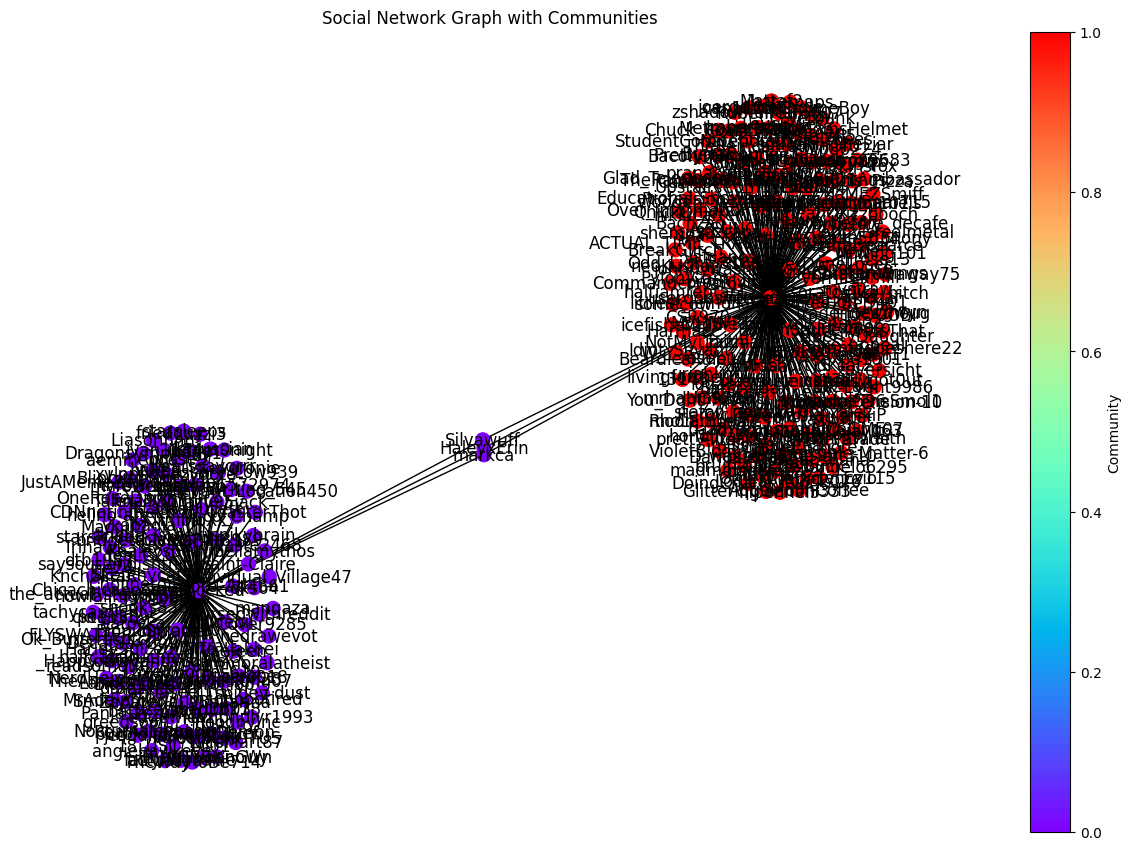

In [44]:
# Visualize the graph with communities
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    node_color=[G.nodes[node]["community"] for node in G.nodes],
    cmap=plt.cm.rainbow,
    with_labels=True,
    node_size=100,
)

# Add a color bar to the plot for community visualization
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow)
sm.set_array([])
plt.colorbar(sm, label='Community')
plt.title("Social Network Graph with Communities")
plt.show()

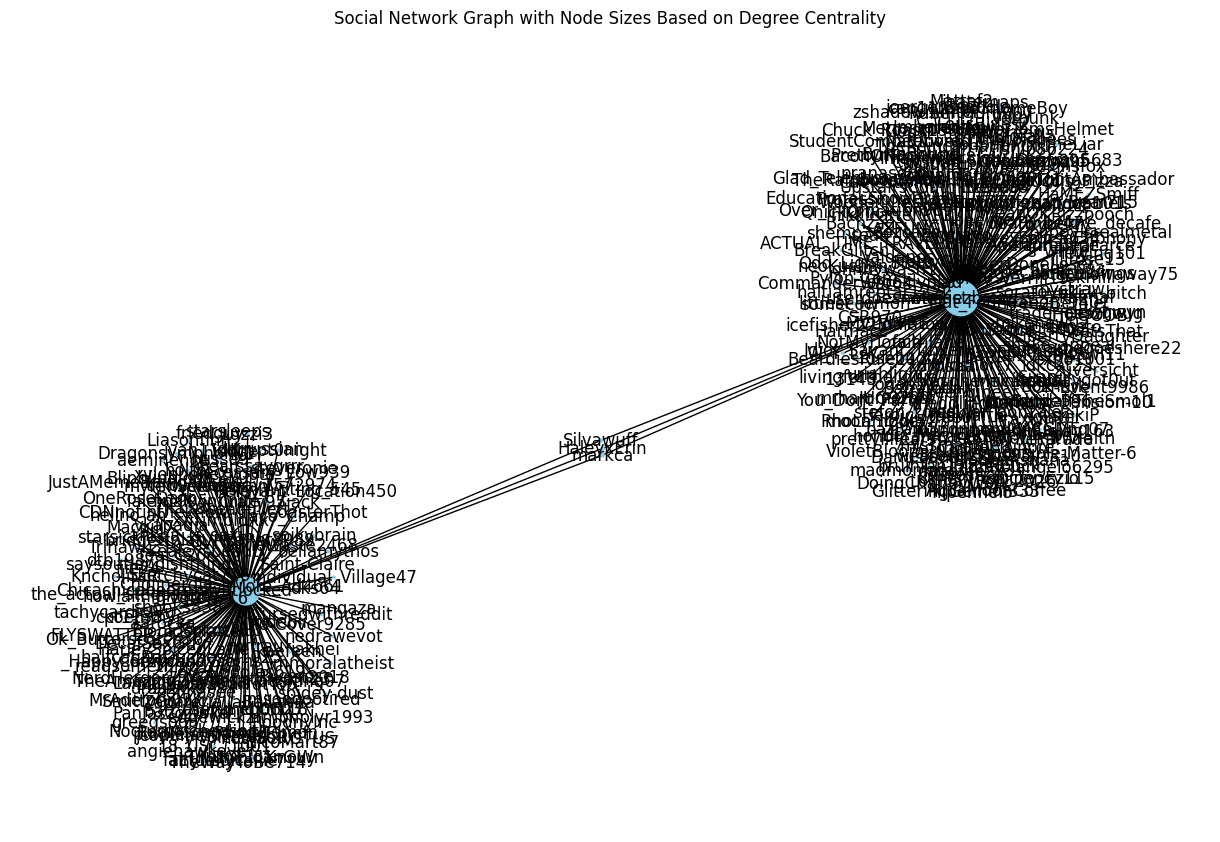

In [45]:
# Calculate degree centrality for each author
degree_centrality = nx.degree_centrality(G)

# Create a list of degree centrality values for nodes
node_sizes = [1000 * degree_centrality[node] for node in G.nodes]

# Visualize the graph with node sizes based on degree centrality
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    node_color='skyblue',
    with_labels=True,
    node_size=node_sizes,
)
plt.title("Social Network Graph with Node Sizes Based on Degree Centrality")
plt.show()


In [37]:
# Calculate degree centrality for each author
degree_centrality = nx.degree_centrality(G)


In [38]:
# Sort authors by degree centrality in descending order
sorted_authors_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

In [39]:
# Print authors with the highest degree centrality values
num_top_authors = 5  # You can change this number to get more or fewer top authors
top_authors = sorted_authors_by_degree[:num_top_authors]

In [40]:
print(f"Authors with the Highest Degree Centrality:")
for author, centrality in top_authors:
    print(f"Author: {author}, Degree Centrality: {centrality}")

Authors with the Highest Degree Centrality:
Author: witchezbrew, Degree Centrality: 0.6197604790419162
Author: swiftlocked, Degree Centrality: 0.3922155688622755
Author: HaleyxErin, Degree Centrality: 0.005988023952095809
Author: markca, Degree Centrality: 0.005988023952095809
Author: Silvawuff, Degree Centrality: 0.005988023952095809


In [31]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")


Betweenness Centrality:
Node swiftlocked: 0.6129093165021309
Node Saint-Claire: 0.0
Node angiehawkeye: 0.0
Node CDNnotintheknow: 0.0
Node bearssaygrrr: 0.0
Node OneRoseDark: 0.0
Node est2018: 0.0
Node LandOfLostSouls: 0.0
Node bridgettblah: 0.0
Node readsomething1968: 0.0
Node ThatOhioanGuy: 0.0
Node greegsoon: 0.0
Node xylophonezygote: 0.0
Node Macgill7: 0.0
Node Midnightdream23: 0.0
Node NefariousKing07: 0.0
Node Talex1995: 0.0
Node IsaRat8989: 0.0
Node ckt1138: 0.0
Node kaefeen: 0.0
Node MrAdelphi03: 0.0
Node GVRDENS_1: 0.0
Node xXTimbloXx: 0.0
Node JustAMemeBeingADude: 0.0
Node Trihawk310: 0.0
Node ToxicWaste2468: 0.0
Node CoasterThot: 0.0
Node jvan1144: 0.0
Node Ok_Butterscotch3647: 0.0
Node Tvdrone16: 0.0
Node DecafSaxGuy: 0.0
Node imsoooootired: 0.0
Node teaLC20: 0.0
Node shooks838: 0.0
Node aeminence: 0.0
Node crn27: 0.0
Node dtb1987: 0.0
Node Tasty_Writing_545: 0.0
Node RhodyChief: 0.0
Node fairyfleurr: 0.0
Node Cornycandycorns: 0.0
Node jakhei: 0.0
Node jcoddinc: 0.0
Node Ne

In [32]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")


Closeness Centrality:
Node swiftlocked: 0.44952893674293404
Node Saint-Claire: 0.3104089219330855
Node angiehawkeye: 0.3104089219330855
Node CDNnotintheknow: 0.3104089219330855
Node bearssaygrrr: 0.3104089219330855
Node OneRoseDark: 0.3104089219330855
Node est2018: 0.3104089219330855
Node LandOfLostSouls: 0.3104089219330855
Node bridgettblah: 0.3104089219330855
Node readsomething1968: 0.3104089219330855
Node ThatOhioanGuy: 0.3104089219330855
Node greegsoon: 0.3104089219330855
Node xylophonezygote: 0.3104089219330855
Node Macgill7: 0.3104089219330855
Node Midnightdream23: 0.3104089219330855
Node NefariousKing07: 0.3104089219330855
Node Talex1995: 0.3104089219330855
Node IsaRat8989: 0.3104089219330855
Node ckt1138: 0.3104089219330855
Node kaefeen: 0.3104089219330855
Node MrAdelphi03: 0.3104089219330855
Node GVRDENS_1: 0.3104089219330855
Node xXTimbloXx: 0.3104089219330855
Node JustAMemeBeingADude: 0.3104089219330855
Node Trihawk310: 0.3104089219330855
Node ToxicWaste2468: 0.310408921933

#### Path Analysis:

#### Calculate Shortest Paths:

In [48]:
# Calculate the shortest path between two specific authors
author1 = "swiftlocked"
author2 = "Saint-Claire"

In [49]:
shortest_path = nx.shortest_path(G, source=author1, target=author2)
print(f"Shortest Path between {author1} and {author2}: {shortest_path}")

Shortest Path between swiftlocked and Saint-Claire: ['swiftlocked', 'Saint-Claire']


#### Identify Key Connectors:

In [50]:
# Calculate betweenness centrality for each author
betweenness_centrality = nx.betweenness_centrality(G)

In [51]:
# Find authors with the highest betweenness centrality
key_connectors = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)


In [52]:
# Print the top key connectors
num_top_connectors = 5  # You can change this number to get more or fewer top connectors
top_connectors = key_connectors[:num_top_connectors]


In [53]:
print("Top Key Connectors:")
for author, centrality in top_connectors:
    print(f"Author: {author}, Betweenness Centrality: {centrality}")

Top Key Connectors:
Author: witchezbrew, Betweenness Centrality: 0.8492474510438582
Author: swiftlocked, Betweenness Centrality: 0.6129093165021309
Author: HaleyxErin, Betweenness Centrality: 0.1560542578506657
Author: markca, Betweenness Centrality: 0.1560542578506657
Author: Silvawuff, Betweenness Centrality: 0.1560542578506657
